* Jeremy Beard
* Due 20220410
* Week 5
* MSDS650
* Genie Hays

# Week 5 Lab: Supervised Learning

<img align="right" style="padding-right:10px;" src="figures_wk5/knn.png" width=300><br>

This week's assignment will focus completeing a KNN analysis and comparing its performance with other supervised algorithms.


## Our Dataset: 
**Dataset:** bank-additional-full.csv (Provided in folder assign_wk5)

Remember to take a look at the bank-additional-names.txt files for a better understanding of the dataset.


# Assignment Requirements

## Part 1: KNN Analysis
**Objective:** According to the dataset's text file, the target column the last column in the dataset.
   - Cleanup the dataset as you deem appropriate. As always, defend your reasoning!!!
       - Missing values?
       - Column names
   - Prepare the data for machine learning
       - A little EDA goeas a long way
       - Do you need to do anything about data types?
   - KNN analysis
       - What is your objective from the analysis?
       - What is your optimal K? 
       - How about accuracy rate? 
    - Discover any insights from this analysis? 
       - Include numbers/graphs corresponding to your conclusions
       - Discuss ways to improve the performance of your KNN model 
       - Defend and backup your thoughts!!!!!!

## Part 2: Comparison to other supervised algorithm
As we saw in the lecture notebook, algorithm performance varies based on the algorithm used. The lecture demostrated using K-Fold Cross-Validation to compare the performance of several algorithm for the same dataset. 
   - At the end of part 1 you discussed ways to improve the performance of you KNN model. 
       - Implement one of those methods to improve your KNN model performance.
       - Rerun a KNN analysis for your improved dataset
       - Discuss the change in performance from the model in part 1
   - Complete a K-fold cross-validation analysis for your improved model
       - You need to use at less three additional models
       - Discuss the difference in the performance of the 4 algorithms against your improved dataset.

# Deliverables:


Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# I. Introduction

Throughout the course of this assignment 

# II. Methods, III. Code, and IV. Analysis of Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set()


import warnings
warnings.filterwarnings("ignore")

In [2]:
#Cleanup the dataset as you deem appropriate. As always, defend your reasoning!!!
##Missing values?
##Column names
df = pd.read_csv('assign_wk5/bank-additional-full.csv', sep=';')
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


First, let's just get some information about the data! With info(), and shape. Describe() will also be used later on.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

Next, let's rename the columns to something a bit more descriptive. After looking at the text file included, the following column titles seemed appropriate:

In [5]:
#I want to clarify some column names:
# default --> has_credit_in_default
# housing --> has_housing_loan
# loan --> has_personal_loan
# contact --> contact_type
# month --> last_contact_month
# day_of_week --> last_contact_day_of_week
# duration --> last_contact_duration
# campaign --> num_contacts_this_campaign
# pdays --> num_days_prev_campaign
# previous --> num_contacts_prev_campaign
# poutcome --> outcome_prev_campaign
# y --> subbed_term_deposit
df.rename(columns = {'default':'has_credit_in_default', \
                     'housing':'has_housing_loan', \
                     'loan':'has_personal_loan', \
                     'contact':'contact_type', \
                     'month':'last_contact_month', \
                     'day_of_week':'last_contact_day_of_week', \
                     'duration':'last_contact_duration', \
                     'campaign':'num_contacts_this_campaign', \
                     'pdays':'num_days_prev_campaign', \
                     'previous':'num_contacts_prev_campaign', \
                     'poutcome':'outcome_prev_campaign', \
                     'y':'subbed_term_deposit'}, \
          inplace = True)

df.head(20)

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'has_credit_in_default',
       'has_housing_loan', 'has_personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day_of_week',
       'last_contact_duration', 'num_contacts_this_campaign',
       'num_days_prev_campaign', 'num_contacts_prev_campaign',
       'outcome_prev_campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subbed_term_deposit'],
      dtype='object')

In [7]:
df.isnull().sum()

age                           0
job                           0
marital                       0
education                     0
has_credit_in_default         0
has_housing_loan              0
has_personal_loan             0
contact_type                  0
last_contact_month            0
last_contact_day_of_week      0
last_contact_duration         0
num_contacts_this_campaign    0
num_days_prev_campaign        0
num_contacts_prev_campaign    0
outcome_prev_campaign         0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
subbed_term_deposit           0
dtype: int64

So, there are no null values! This is good right? Well, it's not exactly true, since for this dataset, 'unknown' is used to indicate a missing value.

Now let's make plots of all the variables to get a sense of what they look like, and what must be done for data cleaning!

In [8]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

<AxesSubplot:>

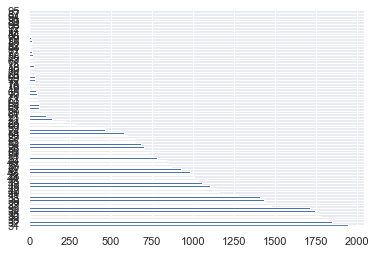

In [9]:
df['age'].value_counts().plot.barh()

In [10]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

<AxesSubplot:>

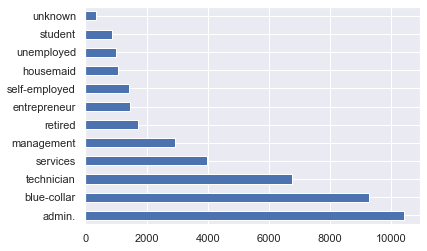

In [11]:
df['job'].value_counts().plot.barh()

In [12]:
df['job'].value_counts()['unknown']

330

In [13]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

<AxesSubplot:>

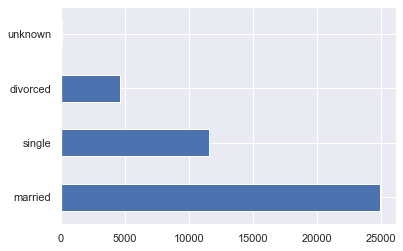

In [14]:
df['marital'].value_counts().plot.barh()

In [15]:
df['marital'].value_counts()['unknown']

80

In [16]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:>

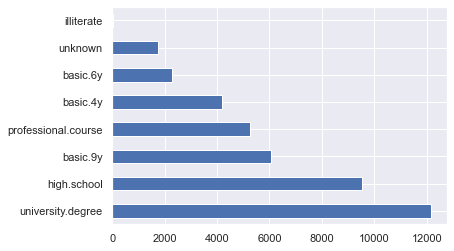

In [17]:
df['education'].value_counts().plot.barh()

In [18]:
df['education'].value_counts()['unknown']

1731

In [19]:
df['has_credit_in_default'].value_counts()

no         32588
unknown     8597
yes            3
Name: has_credit_in_default, dtype: int64

<AxesSubplot:>

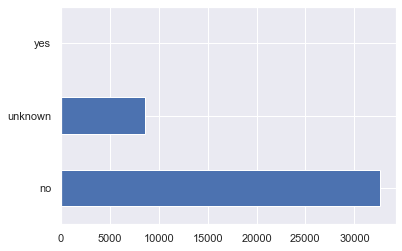

In [20]:
df['has_credit_in_default'].value_counts().plot.barh()

In [21]:
df['has_credit_in_default'].value_counts()['unknown']

8597

In [22]:
df['has_housing_loan'].value_counts()

yes        21576
no         18622
unknown      990
Name: has_housing_loan, dtype: int64

<AxesSubplot:>

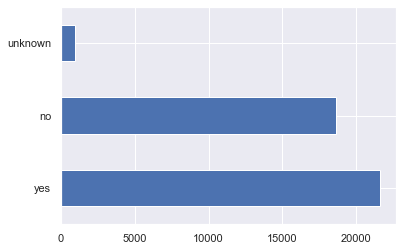

In [23]:
df['has_housing_loan'].value_counts().plot.barh()

In [24]:
df['has_housing_loan'].value_counts()['unknown']

990

In [25]:
df['has_personal_loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: has_personal_loan, dtype: int64

<AxesSubplot:>

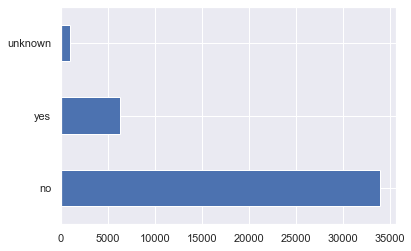

In [26]:
df['has_personal_loan'].value_counts().plot.barh()

In [27]:
df['has_personal_loan'].value_counts()['unknown']

990

In [28]:
df['contact_type'].value_counts()

cellular     26144
telephone    15044
Name: contact_type, dtype: int64

<AxesSubplot:>

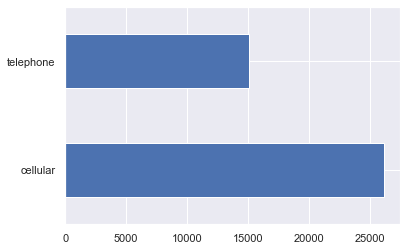

In [29]:
df['contact_type'].value_counts().plot.barh()

In [30]:
df['last_contact_month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: last_contact_month, dtype: int64

<AxesSubplot:>

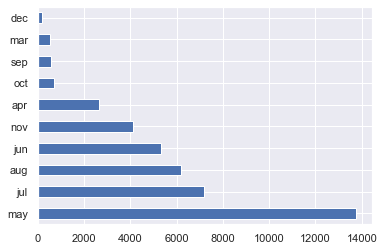

In [31]:
df['last_contact_month'].value_counts().plot.barh()

In [32]:
df['last_contact_day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: last_contact_day_of_week, dtype: int64

<AxesSubplot:>

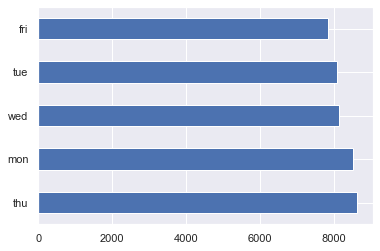

In [33]:
df['last_contact_day_of_week'].value_counts().plot.barh()

In [34]:
df['last_contact_duration'].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: last_contact_duration, Length: 1544, dtype: int64

<AxesSubplot:>

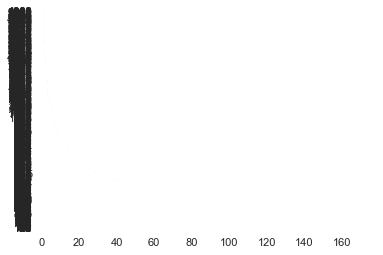

In [35]:
df['last_contact_duration'].value_counts().plot.barh()

In [36]:
df['num_contacts_this_campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: num_contacts_this_campaign, dtype: int64

<AxesSubplot:>

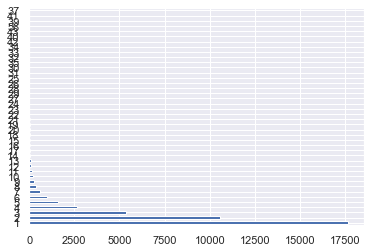

In [37]:
df['num_contacts_this_campaign'].value_counts().plot.barh()

In [38]:
df['num_days_prev_campaign'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: num_days_prev_campaign, dtype: int64

<AxesSubplot:>

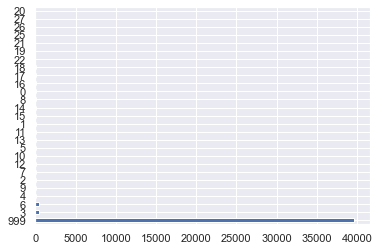

In [39]:
df['num_days_prev_campaign'].value_counts().plot.barh()

In [40]:
df['num_contacts_prev_campaign'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: num_contacts_prev_campaign, dtype: int64

<AxesSubplot:>

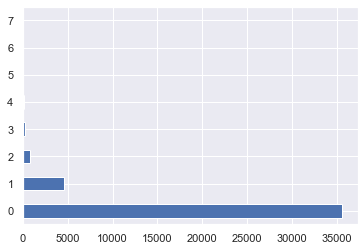

In [41]:
df['num_contacts_prev_campaign'].value_counts().plot.barh()

In [42]:
df['outcome_prev_campaign'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: outcome_prev_campaign, dtype: int64

<AxesSubplot:>

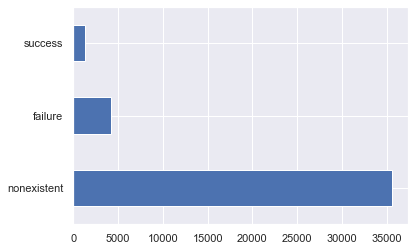

In [43]:
df['outcome_prev_campaign'].value_counts().plot.barh()

In [44]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

<AxesSubplot:>

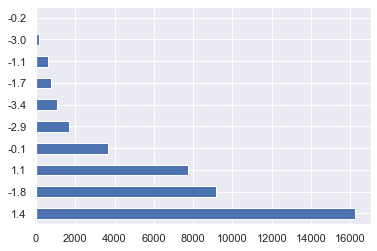

In [45]:
df['emp.var.rate'].value_counts().plot.barh()

In [46]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

<AxesSubplot:>

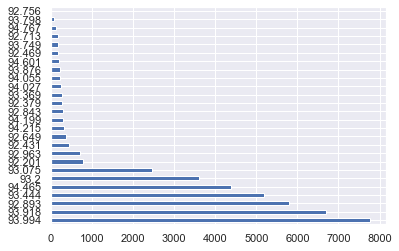

In [47]:
df['cons.price.idx'].value_counts().plot.barh()

In [48]:
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

<AxesSubplot:>

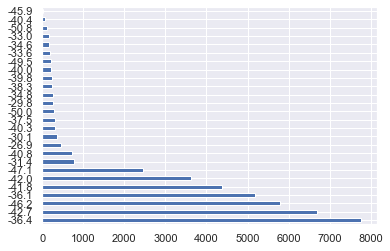

In [49]:
df['cons.conf.idx'].value_counts().plot.barh()

In [50]:
df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

<AxesSubplot:>

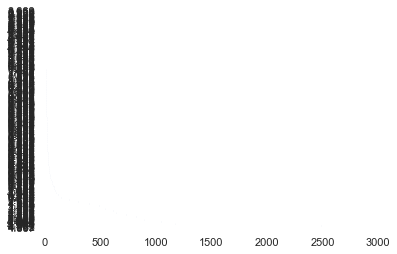

In [51]:
df['euribor3m'].value_counts().plot.barh()

In [52]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

<AxesSubplot:>

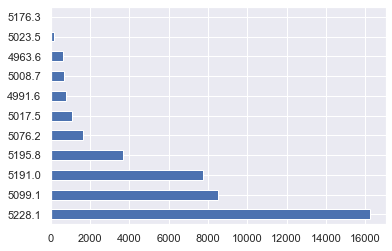

In [53]:
df['nr.employed'].value_counts().plot.barh()

In [54]:
df['subbed_term_deposit'].value_counts()

no     36548
yes     4640
Name: subbed_term_deposit, dtype: int64

<AxesSubplot:>

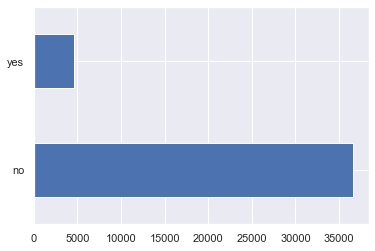

In [55]:
df['subbed_term_deposit'].value_counts().plot.barh()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         41188 non-null  int64  
 1   job                         41188 non-null  object 
 2   marital                     41188 non-null  object 
 3   education                   41188 non-null  object 
 4   has_credit_in_default       41188 non-null  object 
 5   has_housing_loan            41188 non-null  object 
 6   has_personal_loan           41188 non-null  object 
 7   contact_type                41188 non-null  object 
 8   last_contact_month          41188 non-null  object 
 9   last_contact_day_of_week    41188 non-null  object 
 10  last_contact_duration       41188 non-null  int64  
 11  num_contacts_this_campaign  41188 non-null  int64  
 12  num_days_prev_campaign      41188 non-null  int64  
 13  num_contacts_prev_campaign  411

In [57]:
df = df.replace('unknown', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         41188 non-null  int64  
 1   job                         40858 non-null  object 
 2   marital                     41108 non-null  object 
 3   education                   39457 non-null  object 
 4   has_credit_in_default       32591 non-null  object 
 5   has_housing_loan            40198 non-null  object 
 6   has_personal_loan           40198 non-null  object 
 7   contact_type                41188 non-null  object 
 8   last_contact_month          41188 non-null  object 
 9   last_contact_day_of_week    41188 non-null  object 
 10  last_contact_duration       41188 non-null  int64  
 11  num_contacts_this_campaign  41188 non-null  int64  
 12  num_days_prev_campaign      41188 non-null  int64  
 13  num_contacts_prev_campaign  411

In [58]:
# let's change string values to numerical
df.has_credit_in_default[df.has_credit_in_default == 'no'] = 0
df.has_credit_in_default[df.has_credit_in_default == 'yes'] = 1
df.head(20)

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
# let's change string values to numerical
df.has_housing_loan[df.has_housing_loan == 'no'] = 0
df.has_housing_loan[df.has_housing_loan == 'yes'] = 1
df.head(20)

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,0,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,0,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [60]:
# let's change string values to numerical
df.has_personal_loan[df.has_personal_loan == 'no'] = 0
df.has_personal_loan[df.has_personal_loan == 'yes'] = 1
df.head(20)

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
# let's change string values to numerical
df.subbed_term_deposit[df.subbed_term_deposit == 'no'] = 0
df.subbed_term_deposit[df.subbed_term_deposit == 'yes'] = 1
df.head(20)

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,NaN,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,NaN,NaN,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
# let's change string values to numerical
df.outcome_prev_campaign[df.outcome_prev_campaign == 'failure'] = 0
df.outcome_prev_campaign[df.outcome_prev_campaign == 'success'] = 1
df.outcome_prev_campaign[df.outcome_prev_campaign == 'nonexistent'] = np.nan
#df = df.replace('unknown', np.nan)
df

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0,0,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1


In [63]:
# let's change string values to numerical
df.contact_type[df.contact_type == 'telephone'] = 0
df.contact_type[df.contact_type == 'cellular'] = 1
df

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,1,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,1,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1


In [64]:
# let's change string values to numerical
df.marital[df.marital == 'divorced'] = 0
df.marital[df.marital == 'single'] = 1
df.marital[df.marital == 'married'] = 2
df

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,2,basic.4y,0,0,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,2,high.school,NaN,0,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,2,high.school,0,1,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,2,basic.6y,0,0,0,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,2,high.school,0,0,1,0,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,2,professional.course,0,1,0,1,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,2,professional.course,0,0,0,1,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,2,university.degree,0,1,0,1,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,2,professional.course,0,0,0,1,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1


In [65]:
# let's change string values to numerical
df.last_contact_day_of_week[df.last_contact_day_of_week == 'mon'] = 1
df.last_contact_day_of_week[df.last_contact_day_of_week == 'tue'] = 2
df.last_contact_day_of_week[df.last_contact_day_of_week == 'wed'] = 3
df.last_contact_day_of_week[df.last_contact_day_of_week == 'thu'] = 4
df.last_contact_day_of_week[df.last_contact_day_of_week == 'fri'] = 5
df.last_contact_day_of_week[df.last_contact_day_of_week == 'sat'] = 6
df.last_contact_day_of_week[df.last_contact_day_of_week == 'sun'] = 7
df

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,2,basic.4y,0,0,0,0,may,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,2,high.school,NaN,0,0,0,may,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,2,high.school,0,1,0,0,may,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,2,basic.6y,0,0,0,0,may,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,2,high.school,0,0,1,0,may,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,2,professional.course,0,1,0,1,nov,5,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,2,professional.course,0,0,0,1,nov,5,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,2,university.degree,0,1,0,1,nov,5,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,2,professional.course,0,0,0,1,nov,5,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1


In [66]:
# let's change string values to numerical
df.last_contact_month[df.last_contact_month == 'jan'] = 1
df.last_contact_month[df.last_contact_month == 'feb'] = 2
df.last_contact_month[df.last_contact_month == 'mar'] = 3
df.last_contact_month[df.last_contact_month == 'apr'] = 4
df.last_contact_month[df.last_contact_month == 'may'] = 5
df.last_contact_month[df.last_contact_month == 'jun'] = 6
df.last_contact_month[df.last_contact_month == 'jul'] = 7
df.last_contact_month[df.last_contact_month == 'aug'] = 8
df.last_contact_month[df.last_contact_month == 'sep'] = 9
df.last_contact_month[df.last_contact_month == 'oct'] = 10
df.last_contact_month[df.last_contact_month == 'nov'] = 11
df.last_contact_month[df.last_contact_month == 'dec'] = 12
df

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,...,num_contacts_this_campaign,num_days_prev_campaign,num_contacts_prev_campaign,outcome_prev_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subbed_term_deposit
0,56,housemaid,2,basic.4y,0,0,0,0,5,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,2,high.school,NaN,0,0,0,5,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,2,high.school,0,1,0,0,5,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,2,basic.6y,0,0,0,0,5,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,2,high.school,0,0,1,0,5,1,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,2,professional.course,0,1,0,1,11,5,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,2,professional.course,0,0,0,1,11,5,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,2,university.degree,0,1,0,1,11,5,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,2,professional.course,0,0,0,1,11,5,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1


In [67]:
# let's get the dummy valaues for the categorical columns of 'job' and 'education'
df = pd.get_dummies(df, columns = ['job'])
df = pd.get_dummies(df, columns = ['education'])
df

,age,marital,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,last_contact_duration,num_contacts_this_campaign,...,job_student,job_technician,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,2,0,0,0,0,5,1,261,1,...,0,0,0,1,0,0,0,0,0,0
1,57,2,NaN,0,0,0,5,1,149,1,...,0,0,0,0,0,0,1,0,0,0
2,37,2,0,1,0,0,5,1,226,1,...,0,0,0,0,0,0,1,0,0,0
3,40,2,0,0,0,0,5,1,151,1,...,0,0,0,0,1,0,0,0,0,0
4,56,2,0,0,1,0,5,1,307,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2,0,1,0,1,11,5,334,1,...,0,0,0,0,0,0,0,0,1,0
41184,46,2,0,0,0,1,11,5,383,1,...,0,0,0,0,0,0,0,0,1,0
41185,56,2,0,1,0,1,11,5,189,2,...,0,0,0,0,0,0,0,0,0,1
41186,44,2,0,0,0,1,11,5,442,1,...,0,1,0,0,0,0,0,0,1,0


In [68]:
#since outcome_prev_campaign has mostly nonexistent values, i'm just going to remove the whole column
df = df.drop(columns=['outcome_prev_campaign'])
df = df.drop(columns=['num_days_prev_campaign'])


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41108 non-null  object 
 2   has_credit_in_default          32591 non-null  object 
 3   has_housing_loan               40198 non-null  object 
 4   has_personal_loan              40198 non-null  object 
 5   contact_type                   41188 non-null  object 
 6   last_contact_month             41188 non-null  object 
 7   last_contact_day_of_week       41188 non-null  object 
 8   last_contact_duration          41188 non-null  int64  
 9   num_contacts_this_campaign     41188 non-null  int64  
 10  num_contacts_prev_campaign     41188 non-null  int64  
 11  emp.var.rate                   41188 non-null  float64
 12  cons.price.idx                 41188 non-null 

In [70]:
df['subbed_term_deposit'].value_counts()

0    36548
1     4640
Name: subbed_term_deposit, dtype: int64

In [71]:
# now let's cast the cleaned data columns still marked as objects, as ints instead
df['subbed_term_deposit'] = df['subbed_term_deposit'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41108 non-null  object 
 2   has_credit_in_default          32591 non-null  object 
 3   has_housing_loan               40198 non-null  object 
 4   has_personal_loan              40198 non-null  object 
 5   contact_type                   41188 non-null  object 
 6   last_contact_month             41188 non-null  object 
 7   last_contact_day_of_week       41188 non-null  object 
 8   last_contact_duration          41188 non-null  int64  
 9   num_contacts_this_campaign     41188 non-null  int64  
 10  num_contacts_prev_campaign     41188 non-null  int64  
 11  emp.var.rate                   41188 non-null  float64
 12  cons.price.idx                 41188 non-null 

In [72]:
# saving the data to csv so I can look at it
df.to_csv('numerical.csv')


In [73]:
#Prepare the data for machine learning
##A little EDA goeas a long way
##Do you need to do anything about data types?
df

,age,marital,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,last_contact_duration,num_contacts_this_campaign,...,job_student,job_technician,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,2,0,0,0,0,5,1,261,1,...,0,0,0,1,0,0,0,0,0,0
1,57,2,NaN,0,0,0,5,1,149,1,...,0,0,0,0,0,0,1,0,0,0
2,37,2,0,1,0,0,5,1,226,1,...,0,0,0,0,0,0,1,0,0,0
3,40,2,0,0,0,0,5,1,151,1,...,0,0,0,0,1,0,0,0,0,0
4,56,2,0,0,1,0,5,1,307,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2,0,1,0,1,11,5,334,1,...,0,0,0,0,0,0,0,0,1,0
41184,46,2,0,0,0,1,11,5,383,1,...,0,0,0,0,0,0,0,0,1,0
41185,56,2,0,1,0,1,11,5,189,2,...,0,0,0,0,0,0,0,0,0,1
41186,44,2,0,0,0,1,11,5,442,1,...,0,1,0,0,0,0,0,0,1,0


In [74]:
# now let's cast the cleaned data columns still marked as objects, as ints instead
df['contact_type'] = df['contact_type'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41108 non-null  object 
 2   has_credit_in_default          32591 non-null  object 
 3   has_housing_loan               40198 non-null  object 
 4   has_personal_loan              40198 non-null  object 
 5   contact_type                   41188 non-null  int32  
 6   last_contact_month             41188 non-null  object 
 7   last_contact_day_of_week       41188 non-null  object 
 8   last_contact_duration          41188 non-null  int64  
 9   num_contacts_this_campaign     41188 non-null  int64  
 10  num_contacts_prev_campaign     41188 non-null  int64  
 11  emp.var.rate                   41188 non-null  float64
 12  cons.price.idx                 41188 non-null 

In [75]:
# now let's cast the cleaned data columns still marked as objects, as ints instead
df['last_contact_month'] = df['last_contact_month'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41108 non-null  object 
 2   has_credit_in_default          32591 non-null  object 
 3   has_housing_loan               40198 non-null  object 
 4   has_personal_loan              40198 non-null  object 
 5   contact_type                   41188 non-null  int32  
 6   last_contact_month             41188 non-null  int32  
 7   last_contact_day_of_week       41188 non-null  object 
 8   last_contact_duration          41188 non-null  int64  
 9   num_contacts_this_campaign     41188 non-null  int64  
 10  num_contacts_prev_campaign     41188 non-null  int64  
 11  emp.var.rate                   41188 non-null  float64
 12  cons.price.idx                 41188 non-null 

In [76]:
# now let's cast the cleaned data columns still marked as objects, as ints instead
df['last_contact_day_of_week'] = df['last_contact_day_of_week'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41108 non-null  object 
 2   has_credit_in_default          32591 non-null  object 
 3   has_housing_loan               40198 non-null  object 
 4   has_personal_loan              40198 non-null  object 
 5   contact_type                   41188 non-null  int32  
 6   last_contact_month             41188 non-null  int32  
 7   last_contact_day_of_week       41188 non-null  int32  
 8   last_contact_duration          41188 non-null  int64  
 9   num_contacts_this_campaign     41188 non-null  int64  
 10  num_contacts_prev_campaign     41188 non-null  int64  
 11  emp.var.rate                   41188 non-null  float64
 12  cons.price.idx                 41188 non-null 

In [77]:
# since 31760 still seems like a very large dataset, I decided to drop all missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31760 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            31760 non-null  int64  
 1   marital                        31760 non-null  object 
 2   has_credit_in_default          31760 non-null  object 
 3   has_housing_loan               31760 non-null  object 
 4   has_personal_loan              31760 non-null  object 
 5   contact_type                   31760 non-null  int32  
 6   last_contact_month             31760 non-null  int32  
 7   last_contact_day_of_week       31760 non-null  int32  
 8   last_contact_duration          31760 non-null  int64  
 9   num_contacts_this_campaign     31760 non-null  int64  
 10  num_contacts_prev_campaign     31760 non-null  int64  
 11  emp.var.rate                   31760 non-null  float64
 12  cons.price.idx                 31760 non-null 

In [78]:
# now let's cast the cleaned data columns still marked as objects, as ints instead
df['marital'] = df['marital'].astype(int)
df['has_credit_in_default'] = df['has_credit_in_default'].astype(int)
df['has_housing_loan'] = df['has_housing_loan'].astype(int)
df['has_personal_loan'] = df['has_personal_loan'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31760 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            31760 non-null  int64  
 1   marital                        31760 non-null  int32  
 2   has_credit_in_default          31760 non-null  int32  
 3   has_housing_loan               31760 non-null  int32  
 4   has_personal_loan              31760 non-null  int32  
 5   contact_type                   31760 non-null  int32  
 6   last_contact_month             31760 non-null  int32  
 7   last_contact_day_of_week       31760 non-null  int32  
 8   last_contact_duration          31760 non-null  int64  
 9   num_contacts_this_campaign     31760 non-null  int64  
 10  num_contacts_prev_campaign     31760 non-null  int64  
 11  emp.var.rate                   31760 non-null  float64
 12  cons.price.idx                 31760 non-null 

In [79]:
df.describe()

,age,marital,has_credit_in_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day_of_week,last_contact_duration,num_contacts_this_campaign,...,job_student,job_technician,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
count,31760.00000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,...,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000,31760.000000
mean,39.14745,1.458249,0.000094,0.540932,0.156360,0.669395,6.700346,2.982588,259.910264,2.518514,...,0.023552,0.177456,0.023709,0.075850,0.044144,0.135327,0.242601,0.000346,0.136304,0.329030
std,10.47959,0.692782,0.009719,0.498330,0.363202,0.470438,2.133558,1.408518,261.314803,2.709581,...,0.151650,0.382060,0.152144,0.264762,0.205417,0.342078,0.428662,0.018607,0.343116,0.469868
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.00000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,103.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.00000,2.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,181.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.00000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,322.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.00000,2.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,4918.000000,43.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

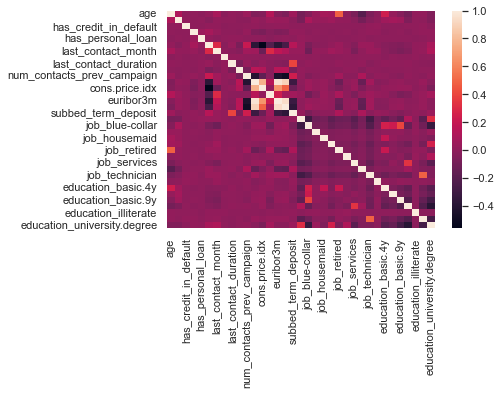

In [80]:
# Let's see the correlation heatmap, just out of curiosity
sns.heatmap(df.corr())

In [81]:
df.shape

(31760, 35)

##### KNN Analysis
* What is your objective from the analysis?
* Answer: The objective from the KNN analysis is to predict if the client has subscribed a term deposit or not. That is to say, the KNN analysis will predict the subbed_term_deposit column in the dataframe

In [82]:

##What is your optimal K?
##How about accuracy rate?
###Discover any insights from this analysis?
##Include numbers/graphs corresponding to your conclusions
##Discuss ways to improve the performance of your KNN model
##Defend and backup your thoughts!!!!!!
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


In [83]:
# first, I will define my features and target(s), and create my train/test data
cols = df.columns
target_col = 'subbed_term_deposit'
feat_cols = [c for c in cols if c != target_col]

array = df.values

X = np.delete(array, 17, 1) #index 17 is the subbed_term_deposit column
y = array[:, 17]
#print(A,B)
print(X)

[[56.  2.  0. ...  0.  0.  0.]
 [37.  2.  0. ...  0.  0.  0.]
 [40.  2.  0. ...  0.  0.  0.]
 ...
 [56.  2.  0. ...  0.  0.  1.]
 [44.  2.  0. ...  0.  1.  0.]
 [74.  2.  0. ...  0.  1.  0.]]


In [84]:
# after defining features and targets, it's time to create train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# after creating the train/test data, I will iterate on the value of the clusters
# This will tell me what is the ideal value of k
# I will set the range of k values to test as 0-39, inclusive.
scores = []
num_clusters = 40
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, num_clusters):
    # output to let us know where we are
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
    preds = model.predict(X_test)
    differs = y_test - preds
    
    print(f'Evaluating {k} clusters: score = {model.score(X_test, y_test)}, \nr2_score = {r2_score(y_test,preds)}, explained_variance_score = {explained_variance_score(y_test,preds)}')
    

Features: ['age', 'marital', 'has_credit_in_default', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'num_contacts_this_campaign', 'num_contacts_prev_campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree'] 
Target: subbed_term_deposit
Evaluating 2 clusters: score = -0.42126379276254045, 
r2_score = -0.42126379276254045, explained_variance_score = -0.4132683495007585
Evaluating 3 clusters: score = -0.26123532809860683, 
r2_score = -0.26123532809860683, explained_variance_score = -0.2542704086350096
Evaluati

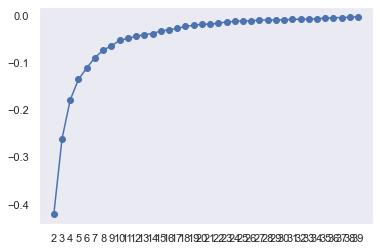

In [86]:
# display the resutls
plt.plot(range(2, num_clusters), scores)
plt.scatter(range(2, num_clusters), scores)
plt.grid()
_ =plt.xticks(range(2, num_clusters))

So, we can see that the optimal value of k is the maximum value tested, or 39 in this case. It appears that as the value of k increases for this specific dataset, the score of the model approaches 0. It is said that a negative score indicates poor performance. Why is my score negative?? What is wrong with the model. Is it the train/test data??

In [87]:
# After learning the optimal value of k, we re-run the model
# This run of the model is using the optimal value of k
model = KNeighborsRegressor(n_neighbors=num_clusters, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)



Actuals for test data set
[0. 0. 0. ... 0. 1. 0.]
Predictions for test data set
[0.325 0.3   0.25  ... 0.175 0.225 0.325]


In [88]:

differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')
print(f'explained_variance_score = {explained_variance_score(y_test,preds)}')

Differences between the two sets:
[-0.325 -0.3   -0.25  ... -0.175  0.775 -0.325]

r2_score: -0.002923447451305794
explained_variance_score = -0.0010620582884426355


###### Discover any insights from this analysis?
* From the analysis, it can be said that the model was really not so accurate in its performance. Its top score only reached a value of -0.001, a value close to 0 but still negative. This indicates the model is not very accurate. The test dataset created used a proportion of 0.3. 

###### Include numbers/graphs corresponding to your conclusions
* As seen above, the scores of the model with regard to the k value used were plotted to clearly indicate the highest scoring k value. For this specific model, it was found that as the k value increased, the score of the model did as well. Therefore, it was pertinent to use the maximum k value tested.

###### Discuss ways to improve the performance of your KNN model
* I believe the proportion of the test data created could be adjusted to hopefully increase the score and make it positive at least. 
* The model could also be improved if the data was cleaned more thoroughly. After initially cleaning the data, I had the choice to impute the remaining missing data or drop the remaining missing data. I saw that there were 31760 datapoints remaining if I chose to remove the missing data. I then decided that 31760 datapoints was still a very large dataset so I went forward with removing the missing data.

###### Defend and backup your thoughts!!!!!!

## Part 2: Comparison to other supervised algorithm
As we saw in the lecture notebook, algorithm performance varies based on the algorithm used. The lecture demostrated using K-Fold Cross-Validation to compare the performance of several algorithm for the same dataset. 
   - At the end of part 1 you discussed ways to improve the performance of you KNN model. 
       - Implement one of those methods to improve your KNN model performance.
       - Rerun a KNN analysis for your improved dataset
       - Discuss the change in performance from the model in part 1


###### Let's try test_size = 0.2, or 20%

In [89]:
# I will choose to find a better proportion of test data in order to
# improve the model score
# The former test proportion was 0.3. I will try 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# after creating the train/test data, I will iterate on the value of the clusters
# This will tell me what is the ideal value of k
# I will set the range of k values to test as 0-39, inclusive.
scores = []
num_clusters = 40
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, num_clusters):
    # output to let us know where we are
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
    preds = model.predict(X_test)
    differs = y_test - preds
    
    print(f'Evaluating {k} clusters: score = {model.score(X_test, y_test)}, \nr2_score = {r2_score(y_test,preds)}, explained_variance_score = {explained_variance_score(y_test,preds)}')
    

Features: ['age', 'marital', 'has_credit_in_default', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'num_contacts_this_campaign', 'num_contacts_prev_campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree'] 
Target: subbed_term_deposit
Evaluating 2 clusters: score = -0.4141622247609509, 
r2_score = -0.4141622247609509, explained_variance_score = -0.407452604892095
Evaluating 3 clusters: score = -0.2504943252459175, 
r2_score = -0.2504943252459175, explained_variance_score = -0.24375569083849347
Evaluating 4

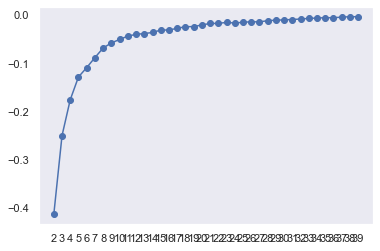

In [91]:
# display the resutls
plt.plot(range(2, num_clusters), scores)
plt.scatter(range(2, num_clusters), scores)
plt.grid()
_ =plt.xticks(range(2, num_clusters))

In [92]:
# After learning the optimal value of k, we re-run the model
# This run of the model is using the optimal value of k
model = KNeighborsRegressor(n_neighbors=num_clusters, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0. 0. 0. ... 0. 0. 0.]
Predictions for test data set
[0.325 0.3   0.325 ... 0.3   0.125 0.425]


In [93]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')
print(f'explained_variance_score = {explained_variance_score(y_test,preds)}')

Differences between the two sets:
[-0.325 -0.3   -0.325 ... -0.3   -0.125 -0.425]

r2_score: -0.0033444204134649436
explained_variance_score = -0.0010440648523450946


###### So, for test_size = 0.2, score = -0.001

###### Now, let's try test_size = 0.15

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [95]:
# after creating the train/test data, I will iterate on the value of the clusters
# This will tell me what is the ideal value of k
# I will set the range of k values to test as 0-39, inclusive.
scores = []
num_clusters = 40
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, num_clusters):
    # output to let us know where we are
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
    preds = model.predict(X_test)
    differs = y_test - preds
    
    print(f'Evaluating {k} clusters: score = {model.score(X_test, y_test)}, \nr2_score = {r2_score(y_test,preds)}, explained_variance_score = {explained_variance_score(y_test,preds)}')
    

Features: ['age', 'marital', 'has_credit_in_default', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'num_contacts_this_campaign', 'num_contacts_prev_campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree'] 
Target: subbed_term_deposit
Evaluating 2 clusters: score = -0.4224716222816851, 
r2_score = -0.4224716222816851, explained_variance_score = -0.41619077356934486
Evaluating 3 clusters: score = -0.2619601714992257, 
r2_score = -0.2619601714992257, explained_variance_score = -0.25588877228294327
Evaluating

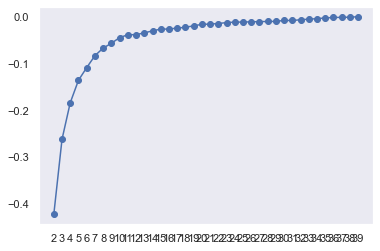

In [96]:
# display the resutls
plt.plot(range(2, num_clusters), scores)
plt.scatter(range(2, num_clusters), scores)
plt.grid()
_ =plt.xticks(range(2, num_clusters))

In [97]:
# After learning the optimal value of k, we re-run the model
# This run of the model is using the optimal value of k
model = KNeighborsRegressor(n_neighbors=num_clusters, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0. 0. 0. ... 1. 0. 1.]
Predictions for test data set
[0.35  0.225 0.35  ... 0.125 0.175 0.225]


In [98]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')
print(f'explained_variance_score = {explained_variance_score(y_test,preds)}')

Differences between the two sets:
[-0.35  -0.225 -0.35  ...  0.875 -0.175  0.775]

r2_score: -6.289089046029872e-05
explained_variance_score = 0.001561835242878784


###### So, for test_size = 0.15, score = +0.002

###### Now let's try test_size = 0.10

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [100]:
# after creating the train/test data, I will iterate on the value of the clusters
# This will tell me what is the ideal value of k
# I will set the range of k values to test as 0-39, inclusive.
scores = []
num_clusters = 40
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, num_clusters):
    # output to let us know where we are
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
    preds = model.predict(X_test)
    differs = y_test - preds
    
    print(f'Evaluating {k} clusters: score = {model.score(X_test, y_test)}, \nr2_score = {r2_score(y_test,preds)}, explained_variance_score = {explained_variance_score(y_test,preds)}')
    

Features: ['age', 'marital', 'has_credit_in_default', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'num_contacts_this_campaign', 'num_contacts_prev_campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree'] 
Target: subbed_term_deposit
Evaluating 2 clusters: score = -0.45477933890724276, 
r2_score = -0.45477933890724276, explained_variance_score = -0.4456358195177139
Evaluating 3 clusters: score = -0.2924290098603959, 
r2_score = -0.2924290098603959, explained_variance_score = -0.28446398852551735
Evaluatin

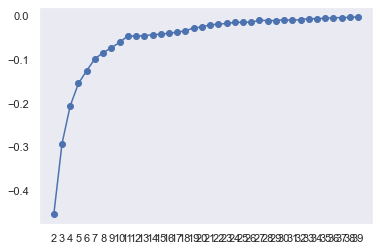

In [101]:
# display the resutls
plt.plot(range(2, num_clusters), scores)
plt.scatter(range(2, num_clusters), scores)
plt.grid()
_ =plt.xticks(range(2, num_clusters))

In [102]:
# After learning the optimal value of k, we re-run the model
# This run of the model is using the optimal value of k
model = KNeighborsRegressor(n_neighbors=num_clusters, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0. 0. 0. ... 1. 0. 0.]
Predictions for test data set
[0.3   0.25  0.35  ... 0.325 0.275 0.475]


In [103]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')
print(f'explained_variance_score = {explained_variance_score(y_test,preds)}')

Differences between the two sets:
[-0.3   -0.25  -0.35  ...  0.675 -0.275 -0.475]

r2_score: -0.0018029991747001706
explained_variance_score = 0.000961053185431493


###### So, for test_size = 0.1, score = +0.001

* So, from the four overall values of test_size tested, test_size=0.15 provided the highest overall model score. The score achieved was positive which is a good sign. However, it's still a low value, only +0.002. However, it's a positive change!

###### K-fold Cross-Validation Analysis

   - Complete a K-fold cross-validation analysis for your improved model
       - You need to use at less three additional models
       - Discuss the difference in the performance of the 4 algorithms against your improved dataset.

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [105]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR(gamma='auto')))

In [106]:
# evaluate each model in turn
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

In [107]:
results = []
names = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.005188 (0.001513)
LASSO: -0.202414 (0.002086)
EN: -0.202425 (0.002082)
KNN: -0.230479 (0.002370)
CART: -0.007038 (0.001468)


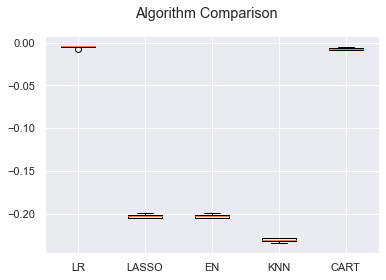

In [108]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

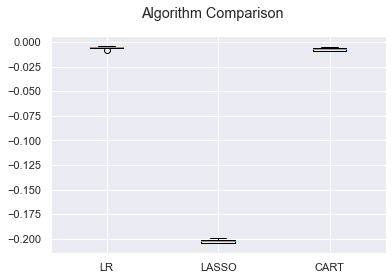

In [109]:
#Now I will drop the 2 lowest-scoring algorithms
#I will drop the EN and KNN algos
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot([results[0], results[1], results[4]])
ax.set_xticklabels([names[0], names[1], names[4]])
pyplot.show()

It is strange, all algorithms sampled still have average scores which were negative. This is disappointing as it points to an inaccurate model. I'm not sure what else can be changed with this specific algorithm comparison to improve the scores. The Linear Regresson algorithm attained the highest score with an average score of -0.005. This was followed by the Decision Tree Regressor with an average score of -0.007. Then scores dropped semi-sharply. All remaining 3 algorithms had scores in the range of ~-0.20. The Lasso algorithm was 3rd highest with an average score of -0.20, the Elastic Net algorithm was 4th with an average score of -0.20, and the KNN algorithm was last with an average score of -0.23. 

# V. Conclusion

In conclusion, the Linear Regression algorithm achieved the highest score when compared against the Lasso, Elastic Net, KNN< and Decision Tree Regressor algorithms. However, this must be taken with a grain of salt as all average scores were negative, which indicates poor model performance. Future steps to be taken with this model can be steps to improve the model performance, such as further experimenting with the test_size proportion, the value of k, and including more data with the process, possibly from a more detailed data cleaning.

Thank you!

# VI. References

1) Dolon, B. (2022, January 6). An Easy Way to Replace Values in a Pandas DataFrame. Medium. Retrieved April 10, 2022, from https://towardsdatascience.com/an-easy-way-to-replace-values-in-a-pandas-dataframe-2826bd34e59a

2) GeeksforGeeks. (2018, February 6). Replacing strings with numbers in Python for Data Analysis. Retrieved April 10, 2022, from https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/

3) Class dataset provided for this assignment: bank-additional-full.csv, bank-additional-names.txt

4) From the Experts PDF: Week 5

5) Week 5 Assignment Lab (Jupyter notebook)

